In [40]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

INPUTS_PATH = os.path.join(os.getcwd(), 'data', 'inputs')
FUTURES_DATA_PATH = os.path.join(INPUTS_PATH, 'pinnacle', 'CLCDATA')

### Main Assets per Asset Class

Commodities

- 'ZG': Gold
- 'ZK': Copper
- 'ZU': Crude Oil
- 'ZN': Natural Gas

Bonds

- 'TU': 2-Year Treasury
- 'FB': 5-Year Treasury
- 'TY': 10-Year Treasury
- 'US': 30-Year Treasury

FX

- 'FN': EUR/USD
- 'BN': GBP/USD
- 'CN': CAD/USD
- 'AN': AUD/USD
- 'JN': JPY/USD

Equities

- 'ES': S&P 500 E-Mini
- 'XU': Euro Stoxx 50
- 'NK': Nikkei
- 'LX': FTSE 100


In [35]:
continuous_future_method = 'RAD'

tickers = {

    # commodities
    'ZG': ['close'], 'ZK': ['close'], 'ZU': ['close'],

    # bonds
    'ZB': ['close'], 'ZC': ['close'], 'ZF': ['close'], 'ZT': ['close'],

    # fx
    'FN': ['close'], 'BN': ['close'], 'CN': ['close'], 'AN': ['close'], 'JN': ['close'],

    # equities
    'ES': ['close'], 'XU': ['close'], 'NK': ['close'], 'LX': ['close'],

}

tickers_data = []
for ticker, flds in tickers.items():
    ticker_data = pd.read_csv(
        os.path.join(FUTURES_DATA_PATH, f'{ticker}_{continuous_future_method}.CSV'),
    )

    # name columns appropriately
    ticker_data.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'open_interest']

    # fix date format
    ticker_data['date'] = pd.to_datetime(ticker_data['date'], format='%m/%d/%Y')

    # select flds
    ticker_data = ticker_data[['date'] + flds]

    # set date as index
    ticker_data.set_index('date', inplace=True)

    # rename flds
    if len(flds) == 1:
        ticker_data.rename(columns={flds[0]: ticker}, inplace=True)
    else:
        ticker_data.rename(columns={fld: f'{ticker}_{fld}' for fld in flds}, inplace=True)

    tickers_data.append(ticker_data)
tickers_data = pd.concat(tickers_data, axis=1)

# resample data to business days and forward fill missing values
tickers_data = tickers_data.resample('B').last().ffill()

# get non-na intersection of all tickers
tickers_data_nonan = tickers_data.copy().dropna(how='any')

# ticker returns
tickers_returns = tickers_data_nonan.pct_change().dropna()

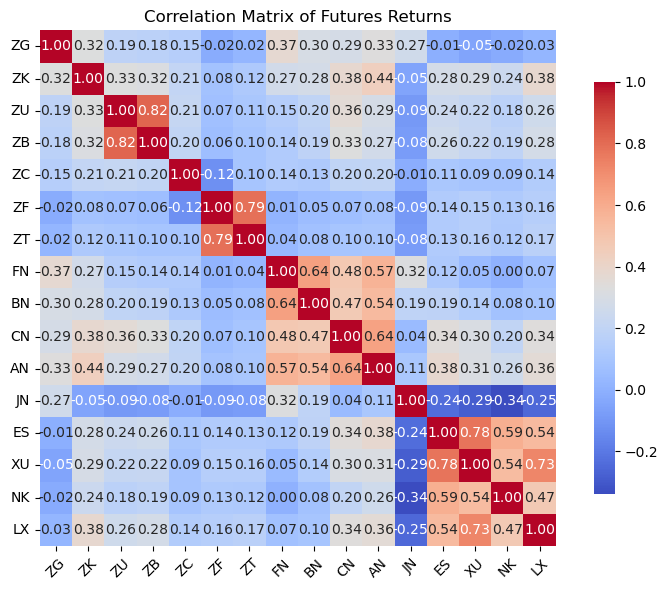

In [43]:
# heatmap of correlations
correlation_matrix = tickers_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Futures Returns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Futures Returns'}, xlabel='date'>

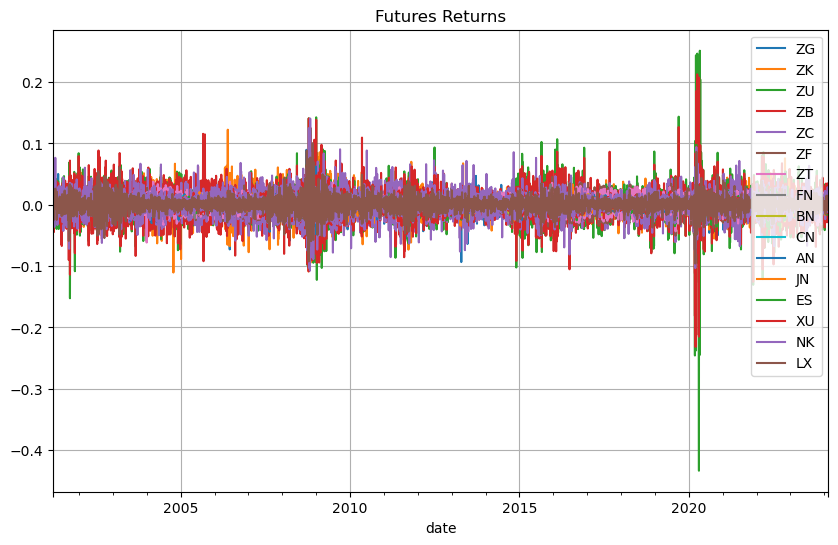

In [45]:
tickers_returns.plot(figsize=(10, 6), title='Futures Returns', grid=True)

<Axes: title={'center': 'ZU Returns'}, xlabel='date'>

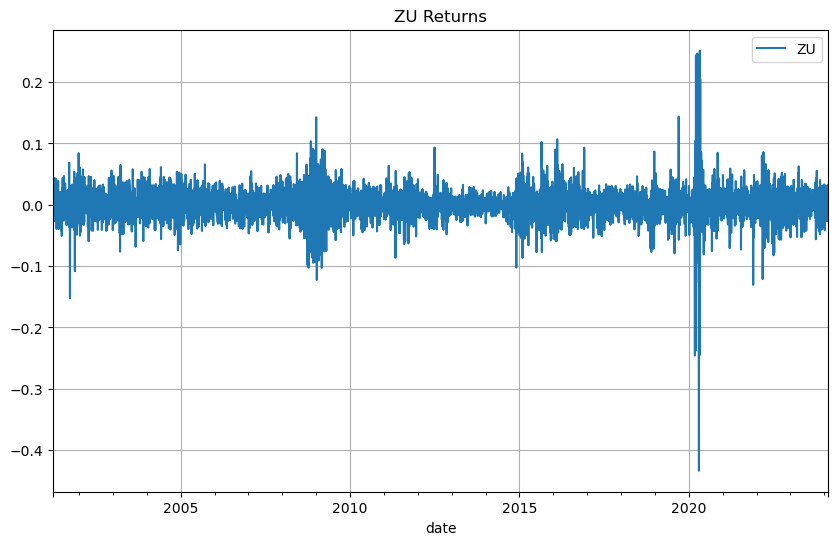

In [46]:
tickers_returns[['ZU']].plot(figsize=(10, 6), title='ZU Returns', grid=True)